# 1. Load and Explore the Fashion MNIST Dataset

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import fashion_mnist

# Loading the Fashion MNIST dataset
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Training set shape: (60000, 28, 28)
Test set shape: (10000, 28, 28)
Training labels shape: (60000,)
Test labels shape: (10000,)


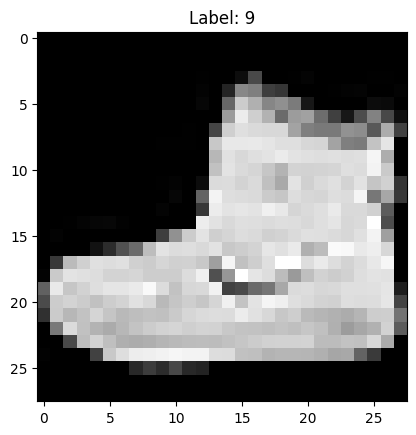

In [ ]:
# Exploring the data
# basic info
print("Training set shape:", train_images.shape)
print("Test set shape:", test_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test labels shape:", test_labels.shape)

# first image and label
plt.imshow(train_images[0], cmap='gray')
plt.title(f"Label: {train_labels[0]}")
plt.show()


# 2. Data Preprocessing

In [ ]:
# class names defination
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# first 10 labels with class names
for i in range(10):
    print(f"Label {train_labels[i]}: {class_names[train_labels[i]]}")


Label 9: Ankle boot
Label 0: T-shirt/top
Label 0: T-shirt/top
Label 3: Dress
Label 0: T-shirt/top
Label 2: Pullover
Label 7: Sneaker
Label 2: Pullover
Label 5: Sandal
Label 5: Sandal


In [ ]:
# occurrences of each class label in the training set
class_counts = np.bincount(train_labels)

# count of samples for each class
for i, count in enumerate(class_counts):
    print(f"Class {i} ({class_names[i]}): {count} samples")


Class 0 (T-shirt/top): 6000 samples
Class 1 (Trouser): 6000 samples
Class 2 (Pullover): 6000 samples
Class 3 (Dress): 6000 samples
Class 4 (Coat): 6000 samples
Class 5 (Sandal): 6000 samples
Class 6 (Shirt): 6000 samples
Class 7 (Sneaker): 6000 samples
Class 8 (Bag): 6000 samples
Class 9 (Ankle boot): 6000 samples


In [ ]:
# Scale the images to a range of 0 to 1
train_images = train_images / 255.0
test_images = test_images / 255.0

# Reshape the data to add a single channel (grayscale)
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

print("Training set shape after reshaping:", train_images.shape)
print("Test set shape after reshaping:", test_images.shape)


Training set shape after reshaping: (60000, 28, 28, 1)
Test set shape after reshaping: (10000, 28, 28, 1)


# 3. Visualizations

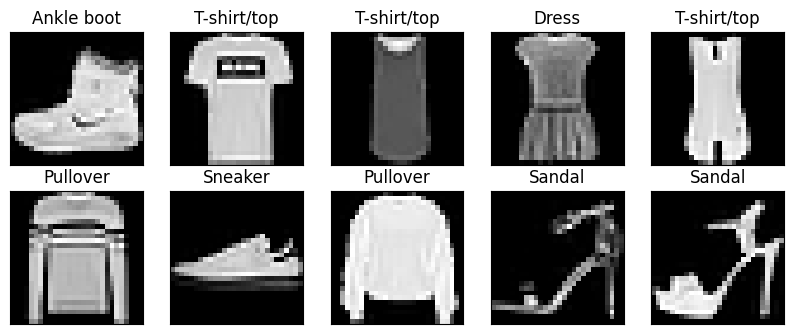

In [ ]:
# 10 sample images from the dataset
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28, 28), cmap='gray')
    plt.title(class_names[train_labels[i]])
plt.show()


<ipython-input-7-0ac40f012802>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=train_labels_df, palette="viridis")


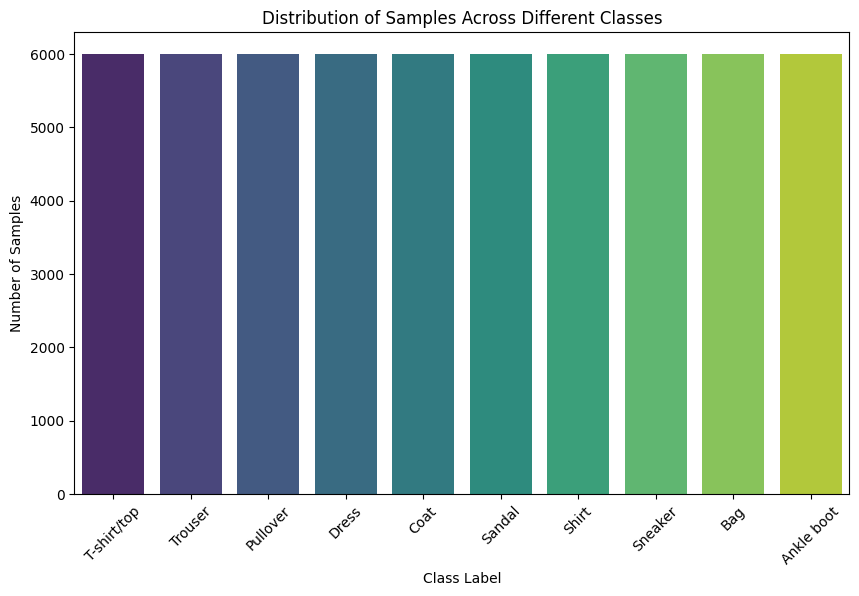

In [ ]:
# Bar Chart for Class Distribution
import pandas as pd

# Convert labels to a DataFrame for easier plotting
train_labels_df = pd.DataFrame(train_labels, columns=['label'])

# Plotting the distribution of samples across different classes
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=train_labels_df, palette="viridis")
plt.title("Distribution of Samples Across Different Classes")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.xticks(ticks=np.arange(len(class_names)), labels=class_names, rotation=45)
plt.show()


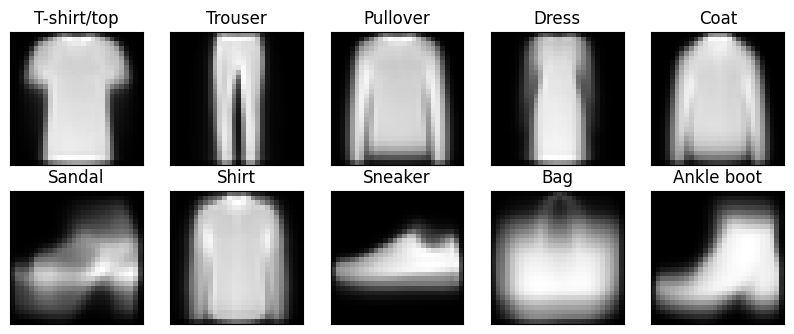

In [ ]:
# Calculate the mean image for each class
mean_images = np.zeros((10, 28, 28))
for i in range(10):
    class_images = train_images[train_labels == i]
    mean_images[i] = class_images.mean(axis=0).reshape(28, 28)

# Display the mean images
plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(mean_images[i], cmap='gray')
    plt.title(class_names[i])
plt.show()


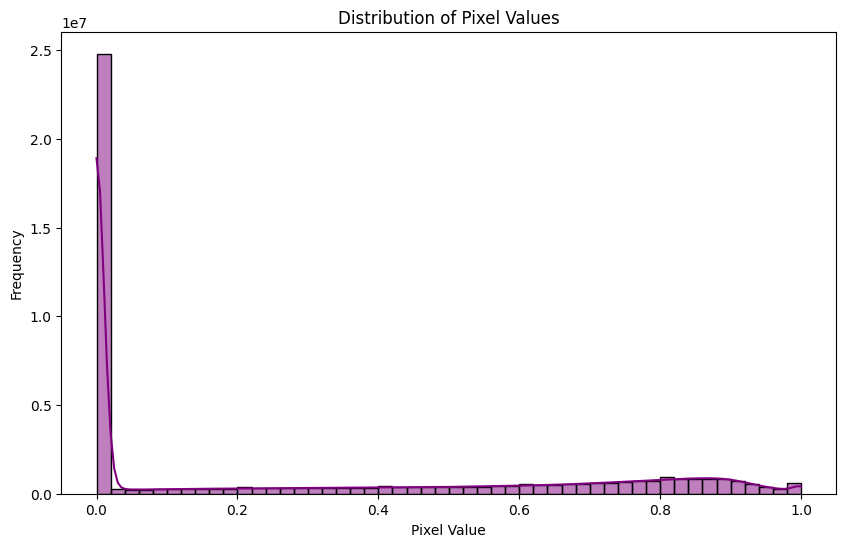

In [ ]:
# Flatten the images to create a single array of pixel values
flattened_images = train_images.flatten()

# Plot the distribution of pixel values
plt.figure(figsize=(10, 6))
sns.histplot(flattened_images, bins=50, color='purple', kde=True)
plt.title("Distribution of Pixel Values")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")
plt.show()


# 4. Building mode(Artificial Neural Network)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Flatten

# Build the model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Display the model summary
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

# 5. Compile the Model

In [ ]:
# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# 6. Training the Model

In [ ]:
# training the model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=128)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7374 - loss: 0.7730 - val_accuracy: 0.8443 - val_loss: 0.4465
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8532 - loss: 0.4212 - val_accuracy: 0.8638 - val_loss: 0.3924
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8683 - loss: 0.3742 - val_accuracy: 0.8703 - val_loss: 0.3749
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8779 - loss: 0.3474 - val_accuracy: 0.8686 - val_loss: 0.3717
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8817 - loss: 0.3300 - val_accuracy: 0.8748 - val_loss: 0.3517
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8896 - loss: 0.3083 - val_accuracy: 0.8783 - val_loss: 0.3393
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8932 - loss: 0.2963 - val_accuracy: 0.8798 - val_loss: 0.3352
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8993 - loss: 0.2789 - val_accuracy: 0.

# 7. Evaluate the Model

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8777 - loss: 0.3438
Test accuracy: 0.8766


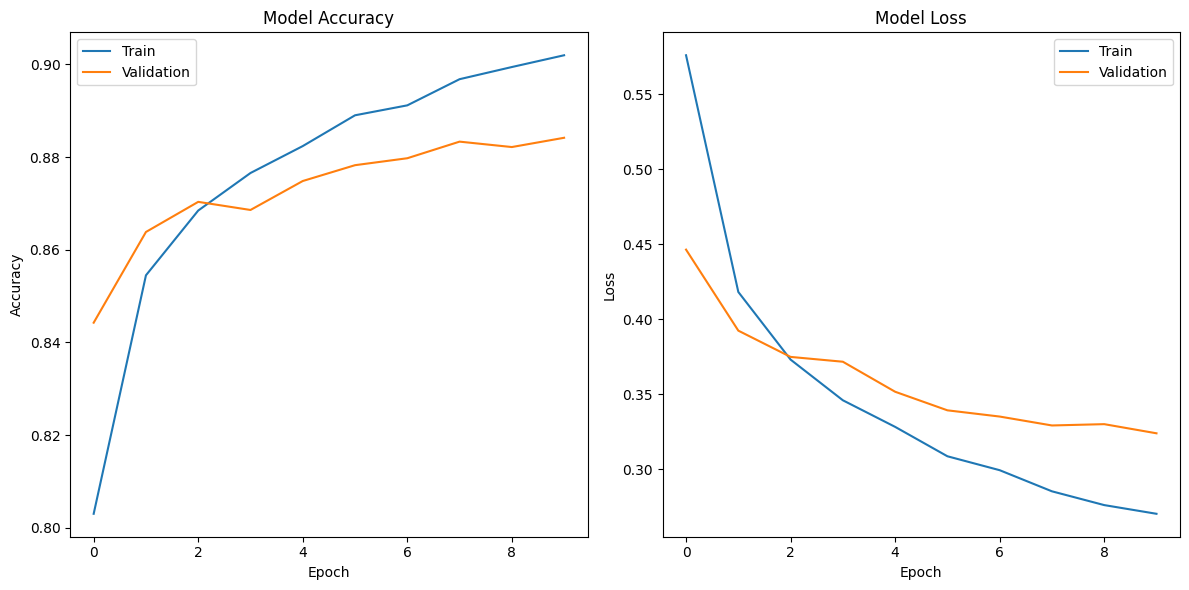

In [ ]:
# evaluating the model
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {accuracy:.4f}")

# plot training history
plt.figure(figsize=(12, 6))

# plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.tight_layout()
plt.show()


In [ ]:
# save the entire model to a HDF5 file
model.save('fashion_mnist_ann_model.h5')
print("Model saved successfully.")


Model saved successfully.


# CNN Model
Trying to get better performance





In [ ]:
from keras.layers import Conv2D, MaxPooling2D, Dropout

# build the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# model summary
model.summary()

# compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

# Training and Evaluation

In [ ]:
# train the CNN model
history = model.fit(train_images, train_labels, epochs=10, validation_split=0.2, batch_size=128)

# evaluate the CNN model on the test set
loss, accuracy = model.evaluate(test_images, test_labels)
print(f"Test accuracy after CNN training: {accuracy:.4f}")


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.7095 - loss: 0.8380 - val_accuracy: 0.8600 - val_loss: 0.4077
Epoch 2/10
157/375 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8693 - loss: 0.3771

Got better test accuracy for CNN (90.61) compared to ANN (87.33)

In [ ]:
# save the model
model.save('fashion_mnist_cnn_model.h5')

# 8. Test Set Prediction

In [ ]:
from keras.models import load_model
# load the previously saved model
loaded_model = load_model('fashion_mnist_cnn_model.h5')

In [ ]:
# use the loaded model to predict classes for the test set
predictions = loaded_model.predict(test_images)

# convert predictions from probabilities to class labels
predicted_classes = np.argmax(predictions, axis=1)


Display Sample Predictions and Images

In [ ]:
# function to display sample predictions

def display_sample_predictions(test_images, test_labels, predicted_classes, class_names, num_samples=10):
    plt.figure(figsize=(15, 5))
    for i in range(num_samples):
        plt.subplot(2, num_samples//2, i + 1)
        plt.imshow(test_images[i].reshape(28, 28), cmap=plt.cm.binary)
        plt.title(f"True: {class_names[test_labels[i]]}\nPred: {class_names[predicted_classes[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()


In [ ]:
# define the class names for Fashion MNIST
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [ ]:
# display sample predictions
display_sample_predictions(test_images, test_labels, predicted_classes, class_names, num_samples=10)